# Bildklassifikation mit Künstlicher Intelligenz

![Mittelstand-Digital Zentrum Hannover](./Bilder/MD_zentrum_hannover_RGB_300dpi.jpg)

### Beispielhafte Umsetzung in einem Jupyter Notebook zur Klassifizierung von Kleidungsstücken mit FashionMNIST Datensatz

Im vorigen Teil des Workshops haben wir die 5 Schritte und deren Umsetzung an einem Beispiel kennengelernt:
- Datensammlung
- Datenbeschriftung
- Datenvorverarbeitung
- Training und Evaluation
- Implementierung

In diesem Hands-On-Teil des Workshops setzen wir das Wissen praktisch um. Wir werden verschiedene einfache KI-Modelle trainieren, um Modeartikel aus dem FashionMNIST-Datensatz zu klassifizieren. Dabei handelt es sich um einen gängigen Datensatz für maschinelles Lernen, der aus 70 000 Schwarz-Weiß Bildern von Kleidungsstücken besteht und öffentlich zugänglich ist. 

Das Ziel ist, die 5 Schritte, die wir zuvor theoretisch behandelt haben, im Kontext einer konkreten KI-Anwendung zu erleben und Erfahrung in der Umsetzung zu sammeln. Sie werden zwei verschiedene neuronale Netze trainieren:
1. ein einfaches neuronales Netzwerk, wie wir es im Theorieteil gesehen haben (auch Multi-Layer Perceptron genannt)
2. ein faltendes NN (engl. Convolutional Neural Network), welches speziell für die Verarbeitung von Bildern entwickelt wurde

In diesem Notebook werden Sie:
- Eine explorative Analyse des Datensatzes durchführen
- die Daten passend vorverarbeiten, um das KI-Training zu ermöglichen
- zwei KI-Modelle (i) definieren und (ii) trainieren
- die Leistung der Modelle evaluieren und vergleichen

Bevor wir loslegen noch eine Einführung in das gezeigte Tool.

### Einführung in Google Colab

Dieses Jupyter Notebook wird über Google Colab ausgeführt. Dies ist eine interaktive Umgebung, in der Sie Code ausführen und gleichzeitig Erklärungen, Texte und Diagramme sehen können - alles in einem Dokument. Hier sind die wichtigsten Schritte, um mit Colab zu arbeiten:

- __Das Notebook ist in Zellen unterteilt__: Es gibt zwei Arten von Zellen: Textzellen (wie diese hier, die Erklärungen enthalten) und Codezellen (in denen Sie Code ausführen können). Jede Zelle ist wie ein Block, den Sie separat bearbeiten und ausführen können.
- __Code ausführen__: Um den Code in einer Codezelle auszuführen, klicken Sie auf das kleine Wiedergabe-Dreieck (▶) links neben der Zelle, oder drücken Sie die Tastenkombination Shift + Enter. Das Ergebnis wird direkt unter der Zelle angezeigt.
- __Zellen bearbeiten__: Sie können jede Zelle anklicken, um sie zu bearbeiten. Bei Textzellen können Sie den Text ändern, bei Codezellen den Code. Achtung: Sollten Sie den Code in einer Codezelle verändern, können Programmfehler auftreten. Nehmen Sie nur in gekennzeichneten Stellen Änderungen vor.
- __Laufzeitumgebung verbinden__: Wenn Sie das Notebook öffnen, müssen Sie es mit einer Laufzeitumgebung verbinden, damit der Code ausgeführt werden kann. Klicken Sie dazu auf "Verbinden" oben rechts. Dadurch wird eine virtuelle Maschine gestartet, die Ihren Code ausführt.
- __Beschleunigung des KI-Trainings__: Sie können kostenlos die Berechnungen beschleunigen lassen. Klicken Sie dazu oben auf den Reiter "Laufzeit" > "Laufzeittyp ändern" und wählen unter "Hardwarebeschleiniger" eine "T4 GPU" aus und drücken auf "Speichern". 
- __Fehlerbehebung__: Wenn etwas schiefgeht oder das Notebook nicht mehr reagiert, können Sie die Laufzeitumgebung neu starten. Klicken Sie dazu auf "Laufzeit" > "Laufzeit neu starten".

Dieses Notebook können Sie über den gleichen Link auch von Zuhause aus abrufen und durchklicken!

# Genutzte Softwarebibliotheken

Im Folgenden werden mehrere Softwarebibliotheken der Programmiersprache Python genutzt:
- __matplotlib__, __seaborn__: Darstellung von Graphen
- __pytorch__, __torchvision__: Eine breit aufgestellte KI-Bibliothek von Meta. Wir nutzen diese, um die KI-Modelle zu definieren, zu trainieren, den Datensatz zu laden und die Daten vorzuverarbeiten.
- __sklearn__ / __Scikit learn__: Von den meisten KI-Entwicklern genutzte KI-Bibliothek, mit der praktisch alles umgesetzt werden kann außer neuronalen Netzen.
- __numpy__ / __np__: Komplexere Mathematik, mehrdimensionale Daten (Arrays)

In der kommenden Code-Zelle werden die benötigten Bibliotheken und Funktionen importiert.

In [2]:
#########################################
#                                       #
#                                       #
#   IMPORT DER SOFTWAREBIBLIOTHEKEN     #
#                                       #
#                                       #
#########################################


import matplotlib.pyplot as plt
import seaborn as sns

import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.nn.functional as F
from torch import optim

from sklearn.metrics import f1_score, confusion_matrix, accuracy_score

import numpy as np

from collections import Counter
import random


##### Zeitnahme zum Start der Ausführung

In [3]:
from datetime import datetime
print(f"Start der Ausführung: {datetime.now()}")
start = datetime.now()

Start der Ausführung: 2024-10-22 13:04:58.787367


## Schritte 1 und 2: Datensammlung und -beschriftung

Wir nutzen den _FashionMNIST_-Datensatz. Durch die große Bekanntheit in der Wissenschaft, können wir darauf kostenfrei zugreifen und ihn herunterladen. 
Das Nutzen von öffentlichen Datensätzen zum Trainieren eigener KI-Modelle wird oft praktiziert. 
Zwar "überspringen" wir damit quasi die ersten beiden Schritte, dies ist aber sinnvoll, um einen schnellen Einstieg zu ermöglichen. 

Um ein besseres Verständnis für den Datensatz zu erhalten, führen wir nun eine kurze explorative Datenanalyse durch. Darin werden Beispielbilder und Statistiken über den Datensatz aufgeführt.

### Datensatz laden
 In der kommenden Code-Zelle wird der Datensatz heruntergeladen. Dies kann ein wenig dauern. Der Datensatz ist bereits in einen Trainingsdatensatz und Testdatensatz aufgeteilt.


In [4]:
# Trainingsdatensatz herunterladen
train_data = datasets.FashionMNIST(
    root='data',
    train=True,
    download=True,
)

# Testdatensatz herunterladen
test_data = datasets.FashionMNIST(
    root='data',
    train=False,
    download=True,
)

Jeder Datenpunkt, also jede Beobachtung, ist im Datensatz dargestellt in 28x28 Zahlenwerten (Pixeln), während die dazugehörige Klasse zwischen bereits in Zahlen (zwischen 0 und 9) kodiert sind.

In [5]:
# Erste Beobachtung aus Datensatz anzeigen
bild, label = train_data[0]

print(bild)
print(label)

<PIL.Image.Image image mode=L size=28x28 at 0x2AF923D6E70>
9


### Explorative Datenanalyse

Als erster Schritt wird die Verteilung von Datenpunkten auf die verschiedenen Klassen untersucht. Wir stellen fest, dass das Verhältnis von Trainings- und Testdaten 85%-Trainingsdaten zu 15% Testdaten ist. Weiterhin sind für jede Klasse die gleiche Anzahl Datenpunkte vorhanden, der Datensatz ist also bzgl. der Klassen gut balanciert.

In [6]:
# Durch unser Vorwissen zu dem Datensatz kennen wir bereits die enthaltenen Klassen
# die Klassen sind im Datensatz schon kodifiziert und nur als Zahl angegeben
# z.B. label 0 bezeichnet Klasse "T-Shirt/Top" und label 1 bezeichnet "Hose"
klassen = ['T-shirt/Top', 'Hose', 'Pullover', 'Kleid', 'Mantel',
                'Sandale', 'Hemd', 'Sneaker', 'Tasche', 'Stiefel']

print(f"Gesamtanzahl der Bilder im Testdatensatz: {len(test_data)}")
print(f"Gesamtanzahl der Bilder im Trainingsdatensatz: {len(train_data)}")


def klassenstatistiken_berechnen_und_anzeigen(datensatz, klassen_labels):
    # Zähle die Anzahl der Vorkommen jeder Klasse im Datensatz
    label_zähler = Counter([label for _, label in datensatz])

    # Berechne einige Statistiken
    anzahl_bilder_total = len(datensatz)
    klassen_stats = {}

    for label, count in label_zähler.items():
        klassenname = klassen[label]
        klassen_stats[klassenname] = {
            'Anzahl Bilder': count,
            'Prozentsatz': (count / anzahl_bilder_total) * 100
        }

    # Ausgabe der Statistiken
    for klassename, stats in klassen_stats.items():
        print(f"Klasse: {klassenname}")
        print(f"  Anzahl Bilder: {stats['Anzahl Bilder']}")
        print(f"  Prozentsatz: {stats['Prozentsatz']:.2f}%")
    
    return klassen_stats

# Aufruf der Funktion
klassen_statistik = klassenstatistiken_berechnen_und_anzeigen(train_data, klassen)


Gesamtanzahl der Bilder im Testdatensatz: 10000
Gesamtanzahl der Bilder im Trainingsdatensatz: 60000
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%
Klasse: Tasche
  Anzahl Bilder: 6000
  Prozentsatz: 10.00%


Als nächstes können wir ein paar Bilder anschauen, um zu verstehen, welche Klassen vorhanden sind und wie die entsprechenden Bilder aussehen. 
Die Menge an Bildern wird durch ```ANZAHL_BEISPIELBILDER``` festgelegt. Daraufhin suchen wir zufällig Bilder aus dem Trainingsdatensatz aus und lassen diese Darstellen.
Durch Erhöhen der Anzahl oder wiederholtes Ausführen der folgenden Code-Zelle können Sie also verschiedene Bilder erzeugen.

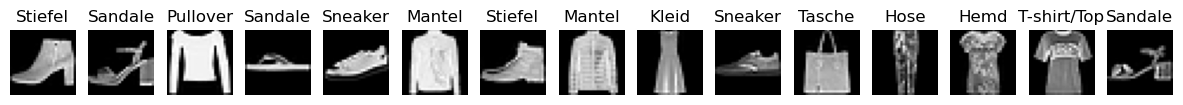

In [7]:
ANZAHL_BEISPIELBILDER = 15 # durch ändern dieser Zahl können Sie mehr oder weniger Beispielbilder erzeugen

# generiert ANZAHL_BEISPIELBILDER zufällige Zahlen zwischen 0 und der Anzahl Bilder im Trainingsdatensatz
bild_ids = [random.randint(0, len(train_data)) for _ in range(ANZAHL_BEISPIELBILDER)]

# Funktion, die (anzahl) Bilder aus (datensatz) darstellt
def bilder_zeigen(ids, datensatz):
    plt.figure(figsize=(15,15))
    
    for i, id in enumerate(ids):
        # Bild und Beschriftung laden
        bild, label = datensatz[id]
        
        # darstellen
        plt.subplot(1, ANZAHL_BEISPIELBILDER, i+1)
        plt.imshow(bild, cmap="gray")
        plt.title(klassen[label]) # die passende Klassenbezeichnung aussuchen!
        plt.axis("off")


    plt.show()


# erste ANZAHL_BEISPIELBILDER Bilder des Datensatzes anzeigen:
bilder_zeigen(bild_ids, train_data)

## Schritt 3: Datenvorverarbeitung

Der bereitgestellte Datensatz hat den Großteil der benötigten Verarbeitungsschritte schon vollzogen. Wie wir gesehen haben, sind z.B. die Klassennamen schon numerisch kodiert und die Bilder maschinenlesbar gespeichert.

Wir definieren eine neue Transformationsfunktion, die die Bilder in einen konsistenten Wertebereich übertragt. Dies hilft der KI im Training, passende Muster einfacher zu erkennen.

In [8]:
transform = transforms.Compose([
    transforms.ToTensor(),  # Transformation des Datentyps
    transforms.Normalize((0.5,), (0.5,))  # Übertragung in konsistenten Wertebereich
])

# Funktion, die Transformation auf Teilmenge des Datensatzes im Training anwendet
def teilmenge_transformieren(teilmenge):
    transformierte_tm = [(transform(bild), label) for bild, label in teilmenge]
    bilder, labels = zip(*transformierte_tm)
    bilder = torch.stack(bilder)
    labels = torch.tensor(labels, dtype=torch.long)
    #labels = torch.stack(labels)
    return bilder, labels

# Erstellung von DataLoadern
# diese automatisieren viele sinnvolle Schritte, wenn wir Daten für das Training einlesen
# und wendet u.a. unsere Transformation an
train_loader = DataLoader(train_data, batch_size=64, shuffle=True, collate_fn=teilmenge_transformieren)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False, collate_fn=teilmenge_transformieren)

# Schritt 4: Training und Evaluation

In den vorigen Zellen haben wir den Datensatz geladen, untersucht und alle weiteren Vorbereitungen getroffen, um darauf KI-Systeme trainieren zu können. Im nächsten Schritt definieren wir unser erstes KI-Modell, ein neuronales Netzwerk aus drei Schichten, umgesetzt mit der Klasse ```nn.Linear```:
- Die erste Schicht (aus 256 Neuronen) nimmt das Bild (alle Pixelwerte) als Input und berechnet erste Merkmale
- Die zweite Schicht (128 Neuronen) verarbeitet diese Merkmale
- Die dritte Schicht (10 Neuronen, sog. Output-Layer) klassifiziert das Bild. 

Genauer kann man sagen, dass jede Neuron einer Klasse zugeordnet ist und entscheidet, mit welcher Wahrscheinlichkeit das Bild der Klasse "X" angehört. Die Klasse mit der höchsten Wahrscheinlichkeit wird als Ergebnis akzeptiert.

In [9]:
# Definition des 3-schichtigen NNs (MLPs)

class FashionMLP(nn.Module):
    # Initiierung der "Bestandteile", hier: 3 Schichten
    # definiert alle Schichten des Netzwerks
    def __init__(self):
        super(FashionMLP, self).__init__()
        self.fc1 = nn.Linear(28*28, 256)  # erste Schicht
        self.fc2 = nn.Linear(256, 128)    # zweite Schicht
        self.fc3 = nn.Linear(128, 10)     # Output-Schicht

    # Definition, wie die Bestandteile zusammenarbeiten
    # x -> Inputbild 
    def forward(self, x):
        x = x.view(-1, 28*28)  # Transformation der Datendarstellung (28x28 Matrix -> 1x748 Array)
        x = F.relu(self.fc1(x))  # Verarbeitung erste Schicht inkl. ReLU-Aktivierungsfunktion
        x = F.relu(self.fc2(x))  # Verarbeitung zweite Schicht (inkl. Aktivierungsfunktion) 
        x = self.fc3(x)  # Dritte Schicht -> Output (10 Logits)
        return x

# nach der Definition erstellen wir das neuronale Netz
model = FashionMLP()
print(model)

# überprüfen, ob Hardwarebeschleuniger verfügbar ist
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)

FashionMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)


FashionMLP(
  (fc1): Linear(in_features=784, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=128, bias=True)
  (fc3): Linear(in_features=128, out_features=10, bias=True)
)

Das jetzt erstellte neuronale Netz kann bereits Bilder klassifizieren. Da die Eigenschaften (Gewichte etc.) jedoch mit Zufallswerten starten und noch nicht trainiert wurden, ist dies wenig sinnvoll. Zu Demonstrationszwecken machen wir das jetzt trotzdem und überprüfen die Leistungsfähigkeit des jetzigen KI-Modells auf dem Testdatensatz durch den ```accuracy_score``` (kurz: Acc), den Prozentsatz der Datenpunkte, die unser Modell korrekt klassifiziert hat.

In [10]:
# hier speichern wir die Vorhersagen unserer KI und die wahren Beschriftungen
all_preds = []
all_labels = []


with torch.no_grad():
    model.eval()
    for images, labels in test_loader:
        # Verschieben auf Hardwarebeschleuniger wenn nötig
        images, labels = images.to(device), labels.to(device)
        
        ######################################################
        ##                                                  ##
        ##   Aufruf des KI Modells mit Bildern als Input    ##
        ##                                                  ##
        ######################################################
        outputs = model(images)
        
        # Vorhersage ist Klasse mit höchster Wahrscheinlichkeit
        _, preds = torch.max(outputs, 1)
        
        # Speichern der Vorhersagen (auf CPU, d.h. nicht Hardwarebeschleuniger)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate F1 Score
f1 = accuracy_score(all_labels, all_preds)
print(f'Anteil der Datenpunkte, die das untrainierte Modell korrekt erkannt hat: {f1:.4f}')

Anteil der Datenpunkte, die das untrainierte Modell korrekt erkannt hat: 0.0898


Alleine durch Zufall kann das KI-Modell schon einige Bilder richtig erkennen.

### Training und Evaluation des Modells

Wir haben alle Voraussetzungen, um unser KI-Modell jetzt trainieren zu können:
- Wir haben einen balancierten Datensatz inkl. Beschriftungen
- Wir haben Vorverarbeitungsschritte eingeführt, um das Daten besser für die Maschine lesbar zu machen
- Wir haben ein KI-Modell (neuronales Netz / Multi-Layer Perceptron) ausgesucht und definiert

Um das Training zu starten, müssen wir noch weitere Entscheidungen treffen, wobei wir nicht auf alle genau eingehen. Wir definieren die Optimierungseigenschaften durch die Wahl einer Loss-Funktion und eines Optimierungsalgorithmus; da die Hintergründe extrem technisch werden, wird darauf nicht weiter eingegangen. Als nächstes müssen wir Evaluationsmetriken aussuchen, anhand derer wir die Leistungsfähigkeit der KI-Modelle abschätzen und vergleichen können.

##### Evaluationsmetriken

Im Vorigen teil, haben wir schon den Anteil der Datenpunkte, die das untrainierte Modell korrekt erkannt hat, genutzt. Diesen sog. ```accuracy```-score werden wir als Vergleichswert weiterhin nutzen.

Die Hauptmetrik wird der im Workshop vorgestellte ```F1-Score``` sein, da dieser eine bessere Abwägung zwischen Präzision und Sensitivität darstellt. Dies geschieht einfach durch Aufruf der ```f1_score()```. Sowohl für Accuracy als auch den F1 Score gilt, dass ein höherer Wert bessere Leistung andeutet und der höchstmögliche Wert ```1.0``` nicht übertroffen werden kann (und bedeutet, dass keine Fehler gemacht werden).

##### Eigenschaften und Stellschrauben der Trainingsschleife

Im Training wird die KI den Trainingsdatensatz typischerweise mehrfach durchlaufen, um die Eigenschaften der Daten besser zu verstehen und dadurch die Leistungsfähigkeit zu steigern. Diese Durchläufe nennt man Epochen, sie können diese durch Veränderung der Variable ```ANZAHL_EPOCHEN``` verändern.

Um die Generalisierungsfähigkeit des KI-Modells einzuschätzen, nutzen wir nach jeder Epoche den Testdatensatz, um die Leistung des Models anhand der Evaluationsmetriken zu überprüfen. Nach jedem Durchlauf werden ein paar Statistiken ausgegeben, um den Trainingsfortschritt darzustellen:
- ```train loss```, ```val loss``` beschreiben den "Loss" auf den Trainingsdaten und Testdaten und sind für dieses Notebook nicht zu wichtig
- ```Val F1``` beschreibt den F1-Score auf den Testdaten (nach der Epoche)
- ```Val Acc``` beschreibt den Accuracy-Score auf den Testdaten (nach der Epoche)

Reminder: Sowohl für Accuracy als auch F1-Score sind höhere Werte besser.

Epoch 1/10.. Train loss: 0.496.. Val loss: 0.426.. Val F1: 0.831.. Val Acc: 0.847
Epoch 2/10.. Train loss: 0.368.. Val loss: 0.437.. Val F1: 0.827.. Val Acc: 0.838
Epoch 3/10.. Train loss: 0.332.. Val loss: 0.362.. Val F1: 0.857.. Val Acc: 0.869
Epoch 4/10.. Train loss: 0.306.. Val loss: 0.370.. Val F1: 0.855.. Val Acc: 0.870
Epoch 5/10.. Train loss: 0.287.. Val loss: 0.343.. Val F1: 0.866.. Val Acc: 0.878
Epoch 6/10.. Train loss: 0.269.. Val loss: 0.343.. Val F1: 0.870.. Val Acc: 0.881
Epoch 7/10.. Train loss: 0.256.. Val loss: 0.354.. Val F1: 0.867.. Val Acc: 0.879
Epoch 8/10.. Train loss: 0.241.. Val loss: 0.336.. Val F1: 0.869.. Val Acc: 0.879
Epoch 9/10.. Train loss: 0.231.. Val loss: 0.346.. Val F1: 0.874.. Val Acc: 0.885
Epoch 10/10.. Train loss: 0.221.. Val loss: 0.348.. Val F1: 0.872.. Val Acc: 0.883


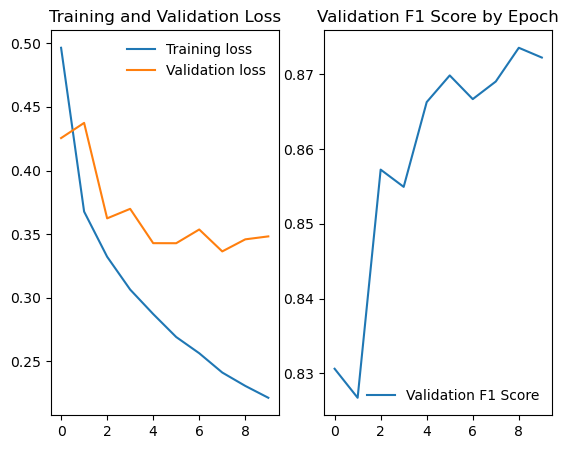

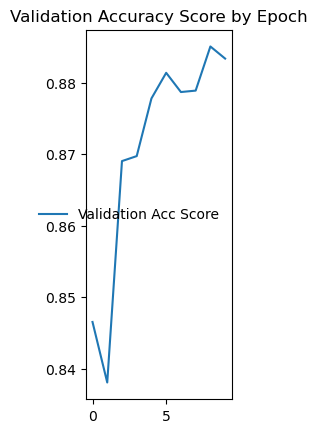

In [11]:
# Definition der Optimierungsziele (Loss-Funktion und Optimierungsalgorithmus)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# wie oft der Trainingsdatensatz im Training wiederholt wird
ANZAHL_EPOCHEN = 10

# Hier behalten wir Statistiken im Auge
train_losses, val_losses, val_f1_scores, val_acc_scores = [], [], [], []

for epoch in range(ANZAHL_EPOCHEN):
    running_loss = 0
    model.train()  # KI-Modell in Trainingsmodus setzen
    
    ######################################################
    ##                                                  ##
    ##   Trainingsschleife: KI-Modell lernt hier dazu   ##
    ##                                                  ##
    ######################################################
    for images, labels in train_loader:
        # wenn möglich Berechnung auf Hardwarebeschleuniger
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        log_ps = model(images)  # KI-Modell macht Vorhersage
        loss = loss_func(log_ps, labels) # Vergleich mit Zielvariablen (Beschriftungen)
        loss.backward()  # Rückverfolgung des Fehlers
        optimizer.step()    # KI-Modell entsprechend des Fehlers verändern
        
        running_loss += loss.item()
    
    
    # Evaluation nachdem der Trainigsdatensatz einmal durchlaufen wurde
    # damit können wir Fortschritte im Training nachvollziehen
    val_loss = 0
    total_f1_score = 0
    total_acc_score = 0
    num_batches = 0
        
    
    with torch.no_grad():
        model.eval()  # KI-Modell in Inferenzmodus setzen
            
        for images, labels in test_loader:
            # wenn möglich Berechnung auf Hardwarebeschleuniger
            images, labels = images.to(device), labels.to(device)
            log_ps = model(images) # Vorhersage
            val_loss += loss_func(log_ps, labels).item() # Loss speichern
                
            # Klasse mit höchster Wahrscheinlichkeit p extrahieren
            ps = torch.exp(log_ps)
            top_p, top_klasse = ps.topk(1, dim=1)
            equals = top_klasse == labels.view(*top_klasse.shape)
            
            # Accuracy und F1 Scores berechnen
            preds = top_klasse.view(-1).cpu().numpy()  # Vorhersagen extrahieren
            true = labels.view(-1).cpu().numpy()  # Echte Werte (Beschriftungen) extrahieren
            total_f1_score += f1_score(true, preds, average='macro')    # Berechnung F1-Score
            total_acc_score += accuracy_score(true, preds)  # Berechnung Accuracy-Score
            num_batches += 1

        # Speichern der Statistiken für spätere Visualisierung
        train_losses.append(running_loss/len(train_loader))
        val_losses.append(val_loss/len(test_loader))
        val_f1_scores.append(total_f1_score/num_batches)
        val_acc_scores.append(total_acc_score/num_batches)

        # Anzeige von Trainingsfortschritt inkl. Loss und Evaluation
        print(f'Epoch {epoch+1}/{ANZAHL_EPOCHEN}.. '
              f'Train loss: {train_losses[-1]:.3f}.. '
              f'Val loss: {val_losses[-1]:.3f}.. '
              f'Val F1: {val_f1_scores[-1]:.3f}.. '
              f'Val Acc: {val_acc_scores[-1]:.3f}')


Selbst nach einer Epoche des Trainings kann das Modell bereits eine deutliche Leistungssteigerung im Vergleich mit dem untrainierten Modell aufweisen!

Um den Trainingsverlauf genauer zu untersuchen, stellen wir die getrackten Statistiken nun graphisch dar.

In [ ]:
# Erstellen von Grafiken für Trainingshistorie, Evaluationshistorie
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses, label='Training loss')
plt.plot(val_losses, label='Validation loss')
plt.title('Training und Validation Loss')
plt.legend(frameon=False)

plt.subplot(1, 3, 2)
plt.plot(val_f1_scores, label='Validation F1 Score')
plt.title('Validation F1 Score nach Epoche')
plt.legend(frameon=False)

plt.subplot(1, 3, 3)
plt.plot(val_acc_scores, label='Validation Acc Score')
plt.title('Validation Accuracy Score nach Epoch')
plt.legend(frameon=False)
plt.show()

Ein Blick auf die Graphen sollte folgendes zeigen:
- Trainingsloss sinkt stetig
- Validierungsloss sinkt bis zu einem gewissen Punkt, ist volatiler
- F1-Score und Accuracy verlaufen ähnlich, aber nicht genau
- F1-Score und Accuracy korrelieren gut, aber nicht perfekt mit Validierungsloss

##### Evaluation nach Training mit Verwirrungsmatrix

Auch wenn das KI-Modell insgesamt gut zu funktionieren scheint, wollen wir dies weiter überprüfen. Mithilfe einer Verwirrungsmatrix können wir untersuchen, für welche Klassen die KI wie besonders genaue Vorhersagen machen kann und welche Klassen sie manchmal verwechselt.

Die Verwirrungsmatrix lässt sich wie folgt lesen:
- auf beiden Achsen ist jede unserer Klassen (z.B. "Hemd" oder "Hose") genau 1x aufgeführt
- die Achsen sind in der gleichen Reihenfolge (oben-unten bzw. links-rechts)
- die linke Achse (oben-unten) führt betitel die Klassen, wie sie im Datensatz beschriftet wurden (die echten Klassen)
- die untere (links-rechts) Achse zeigt die von der KI vorhergesagten Klassen
Jeder Eintrag in der Matrix zeigt nun, wie viele Beobachtungen (des Testdatensatzes) der Klasse L (links) von der KI als Klasse U (unten) eingestuft wurden. Ein paar Beispiele:

Eintrag ganz oben links:
- Klasse L = "T-shirt/top"
- Klasse U = "T-shirt/top"
- Eintrag = 874         (_Hinweis: diese Zahl hängt vom genauen Training ab und wird höchstwahrscheinlich nicht genau stimmen_)
- Die KI hat also 874 Beobachtungen, die ein T-Shirt oder Top waren, auch korrekt als solches erkannt

Eintrag ganz unten links:
- Klasse L = "Stiefel"
- Klasse U = "T-short/Top"
- Eintrag = 1           (_Hinweis: diese Zahl hängt vom genauen Training ab und wird höchstwahrscheinlich nicht genau stimmen_)
- Die KI hat also einen Datenpunkt, der eigentlich ein Bild von einem Stiefel ist, fälschlicherweise als T-Shirt oder Top eingestuft



Da die Achsen in der gleichen Reihenfolge beschriftet sind, sind alle Datenpunkte, wo die KI korrekt lag, in der Hauptdiagonalen zu erkennen. Alle Einträge außerhalb dieser Diagonalen (ungleich 0) stellen dar, dass die KI Fehler gemacht hat.

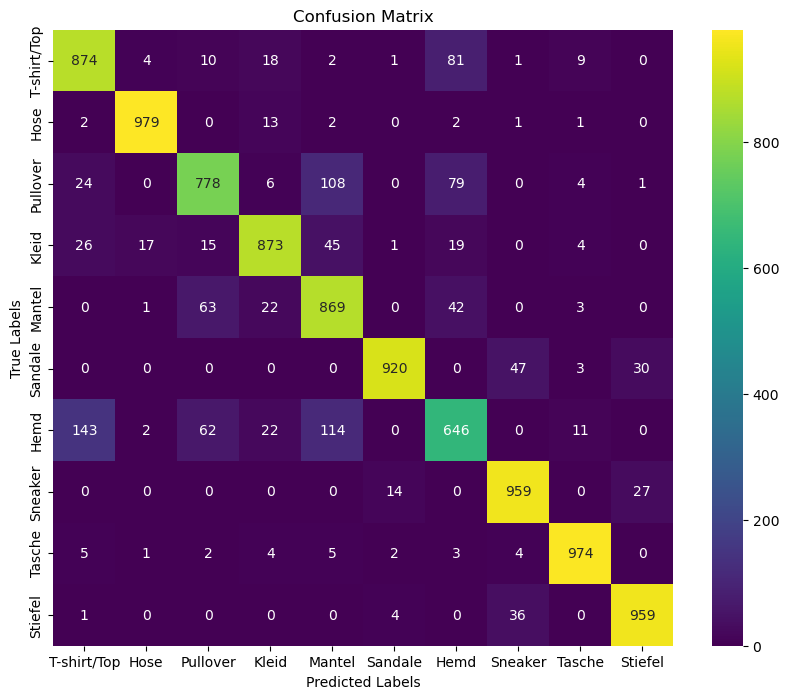

In [13]:
# Speichern der Label
all_preds = []
all_labels = []

# Evaluation
model.eval()  # KI-Modell in Inferenzmodus setzen
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# erstellen der Verwirrungsmatrix
conf_matrix = confusion_matrix(all_labels, all_preds, labels=range(len(klassen)))

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=klassen, yticklabels=klassen)
plt.xlabel('KI-Vorhersage')
plt.ylabel('Echte Label (Beschriftungen)')
plt.title('Verwirrungsmatrix')
plt.show()


Welche Schlüsse können Sie anhand dieser Verwirrungsmatrix schließen?

- Die Diagonale zeigt deutlich höhere Werte, als andere Einträge - ist das gut oder schlecht?
- Treten bestimmte Fehler öfter auf als andere?
- Verwechselt die KI manche Kleidungsstücke öfter miteinander, als andere?

Um die Leistung unseres KI-Modells zu verbessern, gäbe es viele Möglichkeiten. Ist das Ergebnis denn überhaupt gut, oder haben wir z.B. bei der Auswahl und Definition des KI-Modells etwas falsch gemacht? Das überprüfen wir nun anhand eines weiteren KI-Modells, indem wir die gleiche Trainingsschleife mit einem auf Bildverarbeitung spezialisierten neuronalen Netz durchlaufen.


### Training und Evaluation eines zweiten KI-Modells

Ein normales neuronales Netzwerk, wie das MLP, was wir eben gerade definiert und trainiert haben, kann die Bilddaten nicht direkt verarbeiten. Statt die Dimensionalitäten (und damit Lokalisierung der einzelnen Pixel und Informationen) mit Inbretrachtung zu nehmen, mussten wir jedes Bild zuerst in eine eindimensionale Liste von ```28x28 = 784``` einträgen "abflachen". Somit ist es für dieses neuronale Netz deutlich schwieriger, lokale Eigenschaften zu erkennen.

Ein CNN, ein sog. faltendes neuronales Netzwerk, versucht dieses Problem zu lösen. Statt nur mir einer flachen Liste zu arbeiten, sind solche neuronalen Netze darauf ausgelegt, einen Punkt und deren Umgebung zu verarbeiten. Dies wird für (praktisch) alle Bildpunkte wiederholt, wodurch eine Darstellung des Gesamtbildes erzeugt werden kann, die lokale Eigenschaften deutlich besser darstellen und verstehen kann. 

##### Definition des CNN

In der folgenden Code-Zelle definieren wir nun das CNN, um das vorige Mudell zu erweitern. Das Modell besteht aus zwei Faltungsschichten (```nn.Conv2d```) und zwei Schichten, wie wir sie bisher kannten. Weiterhin nutzen wir Eine sog. Pooling-Schicht. Diese hilft dabei, dass die Faltungsschichten größeres rezeptives Feld haben, also kleine und größere räumliche Eigenschaften erkennen können. Zuletzt nutzen wir eine Dropout-Schicht, welche im Training die Generalisierungsfähigkeit verbessert, bei der späteren Nutzung des Modells jedoch keinen Einfluss mehr zeigt. 

Der Code beschreibt die genaue Definition:
- Die erste Faltungsschicht nimmt das S/W-Bild als Eingabe und erzeugt 32 verschiedene Karten lokaler Merkmale.
- Danach die Pooling-Schicht genutzt. Diese verringert die Bildgröße um den Faktor zwei, um die Merkmalsdichte zu erhöhen und das rezeptive Feld der nachfolgenden Schicht zu erweitern.
- die zweite Faltungsschicht verarbeitet die 32 Merkmalskarten weiter und erzeugt insgesamt 64 noch komplere Merkmalskarten.
- Darauf folgt wieder eine Pooling-Aktion
Der Rest des CNNs funktioniert ähnlich dem MLP, welches wir zuvor gesehen haben:
- Die gepoolten Merkmalskarten werden zu einem 1-dimensionalen Vektor abgeflacht (nun insgesamt 3136 Zahlenwerte)
- eine "normale" Schicht (128 Neuronen) verarbeitet diese
- Zuletzt verarbeitet die letzte Output-Schicht (10 Neuronen) diese wiederum, um die Wahrscheinlichkeiten je Klasse darzustellen

In [19]:
class FashionCNN(nn.Module):
    # Initiierung der "Bestandteile"
    def __init__(self):
        super(FashionCNN, self).__init__()
        # zwei faltende Schichten mit 32 bzw. 64 Kanälen
        self.conv1 = nn.Conv2d(1, 32, 3, 1, padding=1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1, padding=1)
        # zwei "normale" Schichten, welche die zuvor berechneten Merkmale zur Klassifikation nutzen
        self.fc1 = nn.Linear(7*7*64, 128) 
        self.fc2 = nn.Linear(128, 10)
        # Pooling-Schicht
        self.pool = nn.MaxPool2d(2, 2)
        # Dropout-Schicht
        self.dropout = nn.Dropout(0.25)

    # Definition, wie Bestandteile zusammenarbeiten
    # x -> Inputbild
    def forward(self, x):
        # Anwendung von Innen nach außen
        # d.h. zuerst Conv1, dann ReLU, dann Pooling
        x = self.pool(F.relu(self.conv1(x)))
        # analog: zuerst Conv2, dann ReLU, dann Pooling
        x = self.pool(F.relu(self.conv2(x)))

        # jetzt: abflachen des mehrdimensionalen Tensors in eine Dimension
        x = torch.flatten(x, 1)
        x = self.dropout(x)
        # Berechnungen analog des MLPs was zuvor definiert wurde
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

# Instantiate the CNN model
cnn_model = FashionCNN().to(device)
print(cnn_model)

FashionCNN(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (fc1): Linear(in_features=3136, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=10, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.25, inplace=False)
)


Auch dieses Modell wird vor dem Training genutzt, um die fehlende Leistung ohne Training darzustellen.

In [ ]:
# hier speichern wir die Vorhersagen unserer KI und die wahren Beschriftungen
all_preds = []
all_labels = []


with torch.no_grad():
    # cnn_model statt model
    cnn_model.eval()
    for images, labels in test_loader:
        # Verschieben auf Hardwarebeschleuniger wenn nötig
        images, labels = images.to(device), labels.to(device)
        
        ######################################################
        ##                                                  ##
        ##   Aufruf des KI Modells mit Bildern als Input    ##
        ##  nach Modelldefinition: einziger Unterschied ist ##
        ##     der Variablenname (cnn_model statt model)    ##
        ##                                                  ##
        ######################################################
        outputs = cnn_model(images)
        
        # Vorhersage ist Klasse mit höchster Wahrscheinlichkeit
        _, preds = torch.max(outputs, 1)
        
        # Speichern der Vorhersagen (auf CPU, d.h. nicht Hardwarebeschleuniger)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

# Calculate F1 Score
f1 = accuracy_score(all_labels, all_preds)
print(f'Anteil der Datenpunkte, die das untrainierte Modell korrekt erkannt hat: {f1:.4f}')

Auch hier ist die Leistung ohne Training nicht sehr gut. Das wollen wir nun ändern.

##### Trainingsschleife des CNNs

Die Trainingsschleife des CNN-Modells entspricht praktisch genau der Trainingsschleife des MLPs zuvor. 

In der folgenden Code-Zelle sind daher nur Veränderungen gegenüber der Trainingsschleife zuvor kommentiert.

In [20]:

# Loss-Funktion muss nicht wieder definiert werden. Wir nutzen dieselbe wie zuvor :)

# Der gleiche Optimierungsalgorithmus wird genutzt, optimiert jetzt aber die Parameter des cnn_model
optimizer = optim.Adam(cnn_model.parameters(), lr=0.001)

# wir müssen dies nicht definieren, wir trainieren gleich lang wie zuvor
#ANZAHL_EPOCHEN = 10

# wir nutzen eigene Variablen, um die Statistiken im Auge zu behalten
# ... und später zw. Modellen vergleichen zu können.
train_losses_cnn, val_losses_cnn, val_f1_scores_cnn, val_acc_scores_cnn = [], [], [], []

for epoch in range(ANZAHL_EPOCHEN):
    running_loss = 0
    # aktuelles Modell in Trainingsmodus setzen, nicht das alte!
    cnn_model.train()
    
    ######################################################
    ##                                                  ##
    ##   Trainingsschleife: KI-Modell lernt hier dazu   ##
    ##                                                  ##
    ######################################################
    for images, labels in train_loader:
        images, labels = images.to(device), labels.to(device)
        
        optimizer.zero_grad()
        log_ps = cnn_model(images)  # cnn-Modell macht Vorhersage
        loss = loss_func(log_ps, labels) 
        loss.backward()  
        optimizer.step()
        
        running_loss += loss.item()
    
    val_loss = 0
    total_f1_score = 0
    total_acc_score = 0
    num_batches = 0
        
    
    with torch.no_grad():
        cnn_model.eval()  # cnn-Modell in Inferenzmodus setzen
            
        for images, labels in test_loader:
            images, labels = images.to(device), labels.to(device)
            # Vorhersage mit CNN-Modell machen
            log_ps = cnn_model(images)
            val_loss += loss_func(log_ps, labels).item()
                
            ps = torch.exp(log_ps)
            top_p, top_klasse = ps.topk(1, dim=1)
            equals = top_klasse == labels.view(*top_klasse.shape)
            

            preds = top_klasse.view(-1).cpu().numpy()
            true = labels.view(-1).cpu().numpy()
            total_f1_score += f1_score(true, preds, average='macro')
            total_acc_score += accuracy_score(true, preds)
            num_batches += 1

        # Speichern der Statistiken für spätere Visualisierung mit neuen Variablen
        train_losses_cnn.append(running_loss/len(train_loader))
        val_losses_cnn.append(val_loss/len(test_loader))
        val_f1_scores_cnn.append(total_f1_score/num_batches)
        val_acc_scores_cnn.append(total_acc_score/num_batches)

        # Anzeige von Trainingsfortschritt inkl. Loss und Evaluation
        print(f'Epoch {epoch+1}/{ANZAHL_EPOCHEN}.. '
              f'Train loss: {train_losses_cnn[-1]:.3f}.. '
              f'Val loss: {val_losses_cnn[-1]:.3f}.. '
              f'Val F1: {val_f1_scores_cnn[-1]:.3f}.. '
              f'Val Acc: {val_acc_scores_cnn[-1]:.3f}')


Epoch 1/10.. Train loss: 0.439.. Val loss: 0.320.. Val F1: 0.872
Epoch 2/10.. Train loss: 0.290.. Val loss: 0.289.. Val F1: 0.882
Epoch 3/10.. Train loss: 0.243.. Val loss: 0.272.. Val F1: 0.895
Epoch 4/10.. Train loss: 0.216.. Val loss: 0.245.. Val F1: 0.906
Epoch 5/10.. Train loss: 0.194.. Val loss: 0.240.. Val F1: 0.906
Epoch 6/10.. Train loss: 0.175.. Val loss: 0.231.. Val F1: 0.915
Epoch 7/10.. Train loss: 0.161.. Val loss: 0.229.. Val F1: 0.913
Epoch 8/10.. Train loss: 0.144.. Val loss: 0.219.. Val F1: 0.918
Epoch 9/10.. Train loss: 0.133.. Val loss: 0.223.. Val F1: 0.918
Epoch 10/10.. Train loss: 0.120.. Val loss: 0.236.. Val F1: 0.915


Wie man sehen kann, müssen - nach der Definition des CNN-Modells - nur sehr wenige Änderungen im Programmcode gemacht werden. 

Die Acc- und F1-Scores deuten schon auf eine bessere Leistungsfähigkeit im Vergleich mit dem vorigen Modell hin. Schauen wir uns den Trainingsverlauf an; auch hier können wir den Programmcode fast genau wiederverwenden.

In [ ]:
# Erstellen von Grafiken für Trainingshistorie, Evaluationshistorie
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses_cnn, label='Training loss')
plt.plot(val_losses_cnn, label='Validation loss')
plt.title('Training und Validation Loss (CNN)')
plt.legend(frameon=False)

plt.subplot(1, 3, 2)
plt.plot(val_f1_scores_cnn, label='Validation F1 Score')
plt.title('Validation F1 Score nach Epoche (CNN)')
plt.legend(frameon=False)

plt.subplot(1, 3, 3)
plt.plot(val_acc_scores_cnn, label='Validation Acc Score')
plt.title('Validation Accuracy Score nach Epoch (CNN)')
plt.legend(frameon=False)
plt.show()

Man kann sehen, dass die Kurven sehr ähnlich aussehen, wie die des Modells davor. Hat sich da überhaupt etwas getan?

Um das zu untersuchen, erzeugen wir mit der folgenden Code-Zelle neue Grafiken, in denen die jeweiligen Statistiken der beiden Modelle übereinander dargestellt werden.

In [ ]:
# Plot training and evaluation history
plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
plt.plot(train_losses_cnn, label='Training loss (CNN)')
plt.plot(val_losses_cnn, label='Validation loss (CNN)')
plt.plot(train_losses, label='Training loss', color="lightblue")
plt.plot(val_losses, label='Validation loss', color="xkcd:peach")
plt.title('Training and Validation Loss')
plt.legend(frameon=False)

plt.subplot(1, 3, 2)
plt.plot(val_f1_scores_cnn, label='Validation F1 Score (CNN)')
plt.plot(val_f1_scores, label='Validation F1 Score', color="lightblue")
plt.title('Validation F1 Score by Epoch')
plt.legend(frameon=False)

plt.subplot(1, 3, 3)
plt.plot(val_acc_scores, label="Valication Acc Score")
plt.plot(val_acc_scores_cnn, label='Validation Acc Score (CNN)', color="lightblue")
plt.title('Validation Accuracy Score nach Epoch')
plt.legend(frameon=False)
plt.show()

In dieser Grafik sind die Unterschiede deutlisch zu sehen: TODO TODO TODO

##### Plots und Evaluation durch Copy-Paste und leichte Änderungen des vorigen Codes

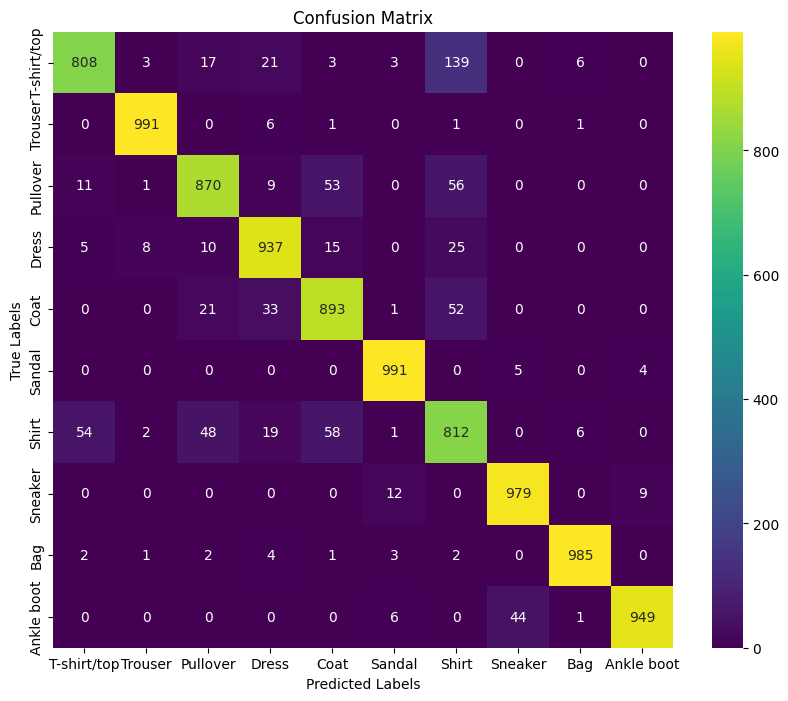

In [22]:
# Containers for all predictions and true labels
all_preds_cnn = []
all_labels_cnn = []

# Evaluate the model on the test set
cnn_model.eval()  # Set the model to evaluation mode
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = cnn_model(images)
        _, predicted = torch.max(outputs, 1)
        all_preds_cnn.extend(predicted.cpu().numpy())
        all_labels_cnn.extend(labels.cpu().numpy())

# Compute the confusion matrix
conf_matrix = confusion_matrix(all_labels_cnn, all_preds_cnn, labels=range(len(class_labels)))

# Plotting the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis', xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


# Ende des Beispiels

##### Zeitnahme zum Ende der Ausführung

In [24]:
stop = datetime.now()
duration = stop - start

print(f"Gesamtdauer: {duration}.")
print(f"Dieser Zeitaufwand wurde {'mit' if torch.cuda.is_available() else 'ohne'} Beschleunigung durch einen Grafikprozessor erreicht.")

Gesamtdauer: 0:05:12.317409.
Dieser Zeitaufwand wurde mit Beschleunigung durch einen Grafikprozessor erreicht.
